In [2]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv("../data/processed/pre-processados.csv")

dados.head()

,Codigo da IES,Fim Lucrativo,Situacao,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17,Saldo 2017 Positivo,Ultimo IGC Categoria,Variacao IGC
0,1712,Lucrativo,Ativa,6545,0.611111,3.0,2.447155,1,0.709251,227,0.000000,3,95453.00,-0.383120,True,Muito Insatisfatório,0.025803
1,3787,Lucrativo,Ativa,1351,0.692308,3.0,1.499900,1,-0.379487,390,0.020513,2,79979200.99,0.580656,True,Muito Insatisfatório,0.000000
2,1131,Lucrativo,Ativa,509,0.645161,4.0,2.597200,1,-0.175687,7132,0.000981,16,2381121.44,0.000000,True,Muito Insatisfatório,-0.031112
3,2755,Lucrativo,Ativa,5956,0.565217,3.0,2.277000,1,0.109510,1041,0.271854,11,4818332.70,-0.117955,True,Muito Insatisfatório,0.011011
4,3536,Não Lucrativo,Ativa,395,0.750000,3.0,2.441500,1,0.207317,82,0.000000,1,-22554.53,3.900988,False,Muito Insatisfatório,0.000000


In [5]:
dados = dados.drop(columns=["Ultimo IGC Categoria","Variacao IGC","Saldo 2017 Positivo"])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Codigo da IES             1420 non-null   int64  
 1   Fim Lucrativo             1420 non-null   object 
 2   Situacao                  1420 non-null   object 
 3   DIAS                      1420 non-null   int64  
 4   Cursos Sem Ato 5 anos     1420 non-null   float64
 5   Ultimo CI                 1420 non-null   float64
 6   Ultimo IGC                1420 non-null   float64
 7   EAD_17                    1420 non-null   int64  
 8   Variacao Matricula 16/17  1420 non-null   float64
 9   Matriculas 17             1420 non-null   int64  
 10  % FIES                    1420 non-null   float64
 11  CURSOS                    1420 non-null   int64  
 12  Saldo 2017                1420 non-null   float64
 13  Variacao do Saldo 16/17   1420 non-null   float64
dtypes: float

In [6]:
dados['Fim Lucrativo'] = dados['Fim Lucrativo'].map({'Lucrativo': 1, 'Não Lucrativo': 0})
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Codigo da IES             1420 non-null   int64  
 1   Fim Lucrativo             1420 non-null   int64  
 2   Situacao                  1420 non-null   object 
 3   DIAS                      1420 non-null   int64  
 4   Cursos Sem Ato 5 anos     1420 non-null   float64
 5   Ultimo CI                 1420 non-null   float64
 6   Ultimo IGC                1420 non-null   float64
 7   EAD_17                    1420 non-null   int64  
 8   Variacao Matricula 16/17  1420 non-null   float64
 9   Matriculas 17             1420 non-null   int64  
 10  % FIES                    1420 non-null   float64
 11  CURSOS                    1420 non-null   int64  
 12  Saldo 2017                1420 non-null   float64
 13  Variacao do Saldo 16/17   1420 non-null   float64
dtypes: float

In [7]:
dados['Situacao'] = dados['Situacao'].map({'Ativa': 1, 'Extinta': 0})
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Codigo da IES             1420 non-null   int64  
 1   Fim Lucrativo             1420 non-null   int64  
 2   Situacao                  1420 non-null   int64  
 3   DIAS                      1420 non-null   int64  
 4   Cursos Sem Ato 5 anos     1420 non-null   float64
 5   Ultimo CI                 1420 non-null   float64
 6   Ultimo IGC                1420 non-null   float64
 7   EAD_17                    1420 non-null   int64  
 8   Variacao Matricula 16/17  1420 non-null   float64
 9   Matriculas 17             1420 non-null   int64  
 10  % FIES                    1420 non-null   float64
 11  CURSOS                    1420 non-null   int64  
 12  Saldo 2017                1420 non-null   float64
 13  Variacao do Saldo 16/17   1420 non-null   float64
dtypes: float

In [8]:
dados.columns

Index(['Codigo da IES', 'Fim Lucrativo', 'Situacao', 'DIAS',
       'Cursos Sem Ato 5 anos', 'Ultimo CI', 'Ultimo IGC', 'EAD_17',
       'Variacao Matricula 16/17', 'Matriculas 17', '% FIES', 'CURSOS',
       'Saldo 2017', 'Variacao do Saldo 16/17'],
      dtype='object')

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecione as colunas para a clusterização
colunas_para_clusterizacao = ['Fim Lucrativo', 'DIAS', 'Cursos Sem Ato 5 anos', 'Ultimo CI',
                              'Ultimo IGC', 'EAD_17', 'Variacao Matricula 16/17', 'Matriculas 17',
                              '% FIES', 'CURSOS', 'Saldo 2017', 'Variacao do Saldo 16/17']

# Normalizar os dados para garantir que todas as características tenham a mesma escala
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados[colunas_para_clusterizacao])

# Vamos considerar um intervalo de possíveis números de clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

best_cluster = None
best_silhouette_score = -1

print("Coeficiente da silhueta médio")

# Itere sobre o número de clusters e calcule o coeficiente de silhueta
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
    cluster_labels = kmeans.fit_predict(dados_normalizados)

    # Calcule o coeficiente de silhueta para o número atual de clusters
    silhouette_avg = silhouette_score(dados_normalizados, cluster_labels)
    print(f"{n_clusters} - {silhouette_avg:.2f}")

    # Verifique se o coeficiente de silhueta atual é melhor que o melhor até agora
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_cluster = n_clusters

print(f"O melhor número de clusters é: {best_cluster}")

Coeficiente da silhueta médio
2 - 0.30
3 - 0.18
4 - 0.19
5 - 0.20
6 - 0.20
7 - 0.21
8 - 0.20
9 - 0.20
O melhor número de clusters é: 2


In [10]:
from sklearn.cluster import KMeans

# Aplicar o algoritmo K-means com o número de clusters desejado
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dados['Cluster'] = kmeans.fit_predict(dados_normalizados)

# Os rótulos dos clusters estão agora na coluna 'Cluster' do DataFrame 'dados'
print(dados['Cluster'].value_counts())

# Você pode acessar os centroides dos clusters usando kmeans.cluster_centers_

# Agora você pode usar os dados clusterizados para análises adicionais ou visualizações


0    1115
1     305
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
dados_normal = pd.DataFrame(dados_normalizados,columns=colunas_para_clusterizacao)
dados_normal.head()

,Fim Lucrativo,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17
0,0.926628,0.961652,0.368398,-0.646632,0.122658,0.342389,0.035855,-0.187026,-0.913725,-0.174939,-0.175925,-0.026545
1,0.926628,-0.576317,0.764020,-0.646632,-1.148939,0.342389,-0.089175,-0.175411,-0.801757,-0.190197,-0.013686,-0.026545
2,0.926628,-0.825638,0.534304,0.824871,0.324079,0.342389,-0.065771,0.305022,-0.908367,0.023413,-0.171283,-0.026545
3,0.926628,0.787246,0.144786,-0.646632,-0.105758,0.342389,-0.033019,-0.129021,0.570163,-0.052876,-0.166333,-0.026545
4,-1.079182,-0.859394,1.045119,-0.646632,0.115067,0.342389,-0.021787,-0.197359,-0.913725,-0.205455,-0.176165,-0.026544


In [12]:
dados_normal["Cluster"] = dados["Cluster"]

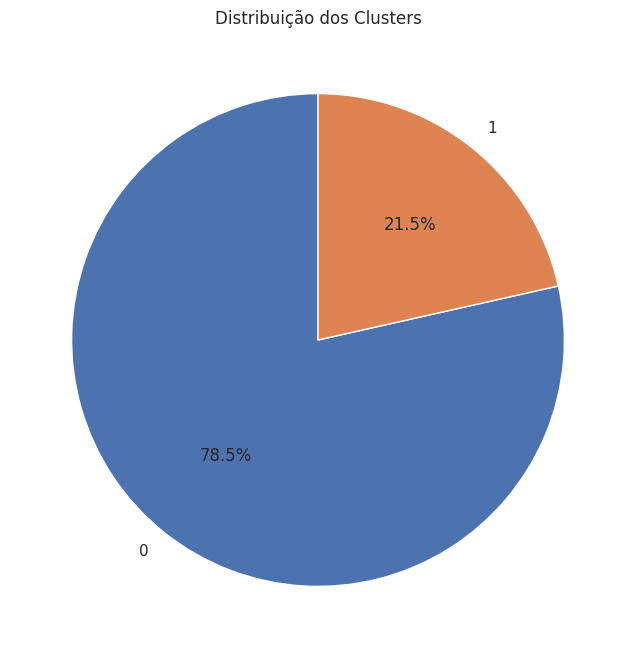

In [13]:
import matplotlib.pyplot as plt

# Contar o número de instâncias em cada cluster
contagem_clusters = dados['Cluster'].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_clusters, labels=contagem_clusters.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Clusters')
plt.show()

In [14]:
centroides = kmeans.cluster_centers_
print(centroides)

[[ 0.0351566  -0.2790448   0.31013889  0.19064768  0.29378554  0.33361782
  -0.0229626   0.04885016  0.20466037  0.02944265  0.06764931  0.00722875]
 [-0.12906174  1.02438815 -1.13853618 -0.69987766 -1.07850219 -1.22472859
   0.0842969  -0.1793315  -0.75131899 -0.10808552 -0.24834416 -0.02653713]]


In [15]:
dados_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fim Lucrativo             1420 non-null   float64
 1   DIAS                      1420 non-null   float64
 2   Cursos Sem Ato 5 anos     1420 non-null   float64
 3   Ultimo CI                 1420 non-null   float64
 4   Ultimo IGC                1420 non-null   float64
 5   EAD_17                    1420 non-null   float64
 6   Variacao Matricula 16/17  1420 non-null   float64
 7   Matriculas 17             1420 non-null   float64
 8   % FIES                    1420 non-null   float64
 9   CURSOS                    1420 non-null   float64
 10  Saldo 2017                1420 non-null   float64
 11  Variacao do Saldo 16/17   1420 non-null   float64
 12  Cluster                   1420 non-null   int32  
dtypes: float64(12), int32(1)
memory usage: 138.8 KB


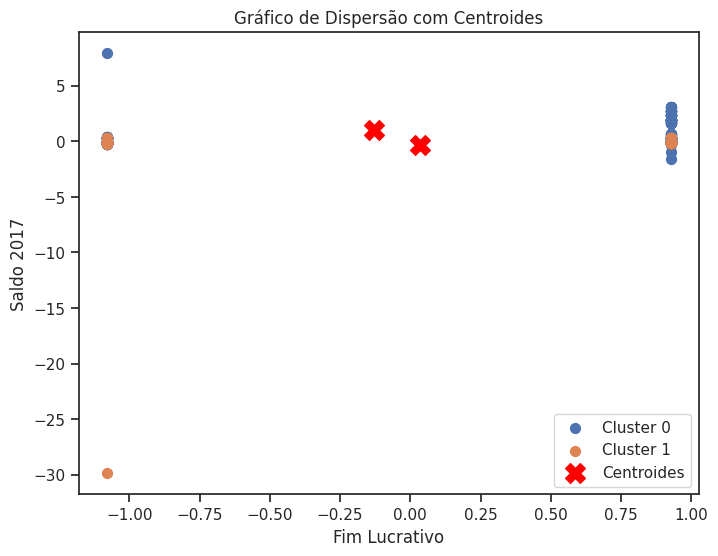

In [16]:
import matplotlib.pyplot as plt

centroides = kmeans.cluster_centers_

# Criar um gráfico de dispersão com os dados e os centroides
plt.figure(figsize=(8, 6))

# Plotar os dados coloridos por cluster
for i in range(num_clusters):
    plt.scatter(dados_normal[dados_normal["Cluster"] == i]['Fim Lucrativo'], dados_normal[dados_normal["Cluster"] == i]['Saldo 2017'], label=f'Cluster {i}', s=50)

# Plotar os centroides como pontos vermelhos
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel('Fim Lucrativo')
plt.ylabel('Saldo 2017')
plt.title('Gráfico de Dispersão com Centroides')
plt.legend()
plt.show()

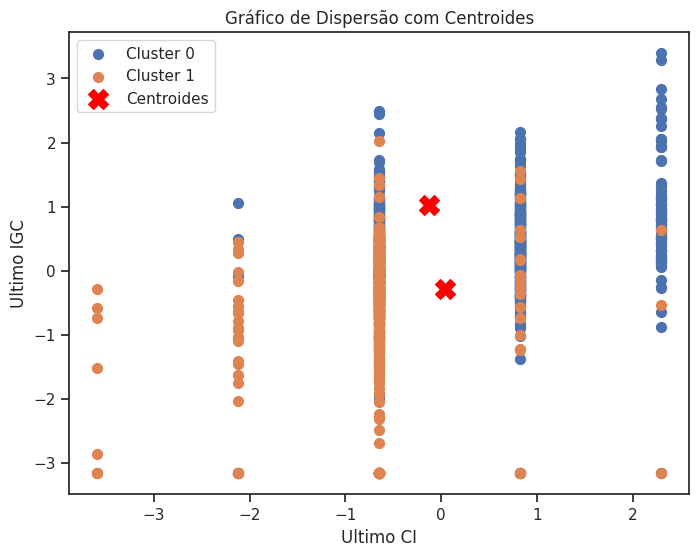

In [17]:
# Criar um gráfico de dispersão com os dados e os centroides
plt.figure(figsize=(8, 6))

# Plotar os dados coloridos por cluster
for i in range(num_clusters):
    plt.scatter(dados_normal[dados_normal["Cluster"] == i]['Ultimo CI'], dados_normal[dados_normal["Cluster"] == i]['Ultimo IGC'], label=f'Cluster {i}', s=50)

# Plotar os centroides como pontos vermelhos
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel('Ultimo CI')
plt.ylabel('Ultimo IGC')
plt.title('Gráfico de Dispersão com Centroides')
plt.legend()
plt.show()

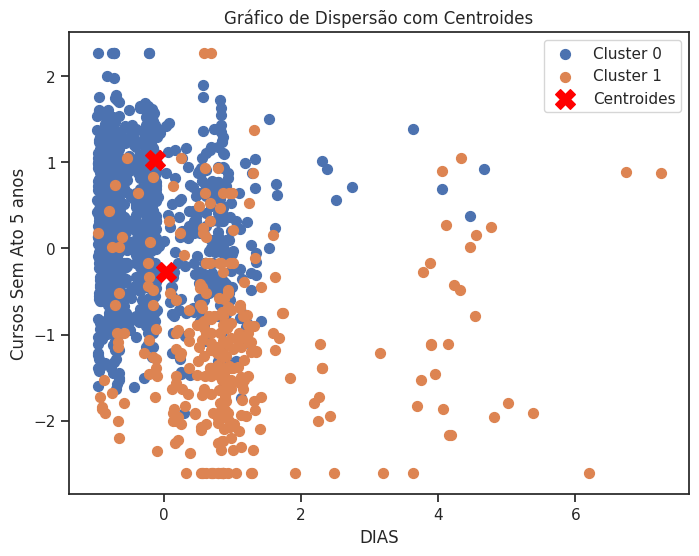

In [18]:
# Criar um gráfico de dispersão com os dados e os centroides
plt.figure(figsize=(8, 6))

# Plotar os dados coloridos por cluster
for i in range(num_clusters):
    plt.scatter(dados_normal[dados_normal["Cluster"] == i]['DIAS'], dados_normal[dados_normal["Cluster"] == i]['Cursos Sem Ato 5 anos'], label=f'Cluster {i}', s=50)

# Plotar os centroides como pontos vermelhos
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel('DIAS')
plt.ylabel('Cursos Sem Ato 5 anos')
plt.title('Gráfico de Dispersão com Centroides')
plt.legend()
plt.show()

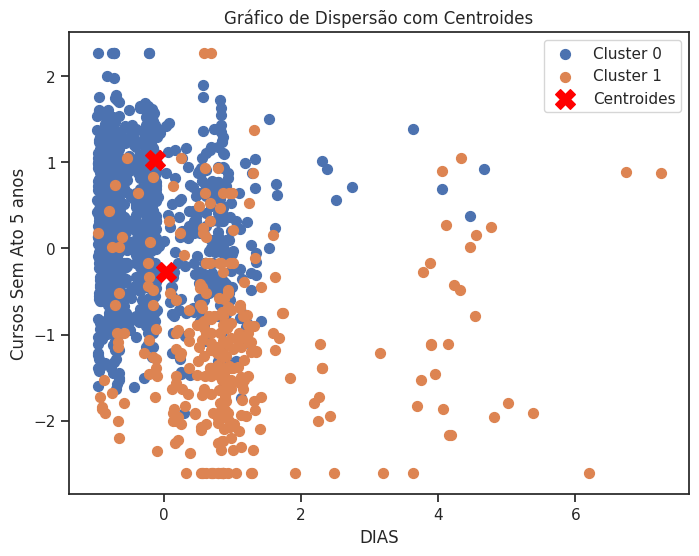

In [19]:
# Criar um gráfico de dispersão com os dados e os centroides
plt.figure(figsize=(8, 6))

# Plotar os dados coloridos por cluster
for i in range(num_clusters):
    plt.scatter(dados_normal[dados_normal["Cluster"] == i]['DIAS'], dados_normal[dados_normal["Cluster"] == i]['Cursos Sem Ato 5 anos'], label=f'Cluster {i}', s=50)

# Plotar os centroides como pontos vermelhos
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel('DIAS')
plt.ylabel('Cursos Sem Ato 5 anos')
plt.title('Gráfico de Dispersão com Centroides')
plt.legend()
plt.show()

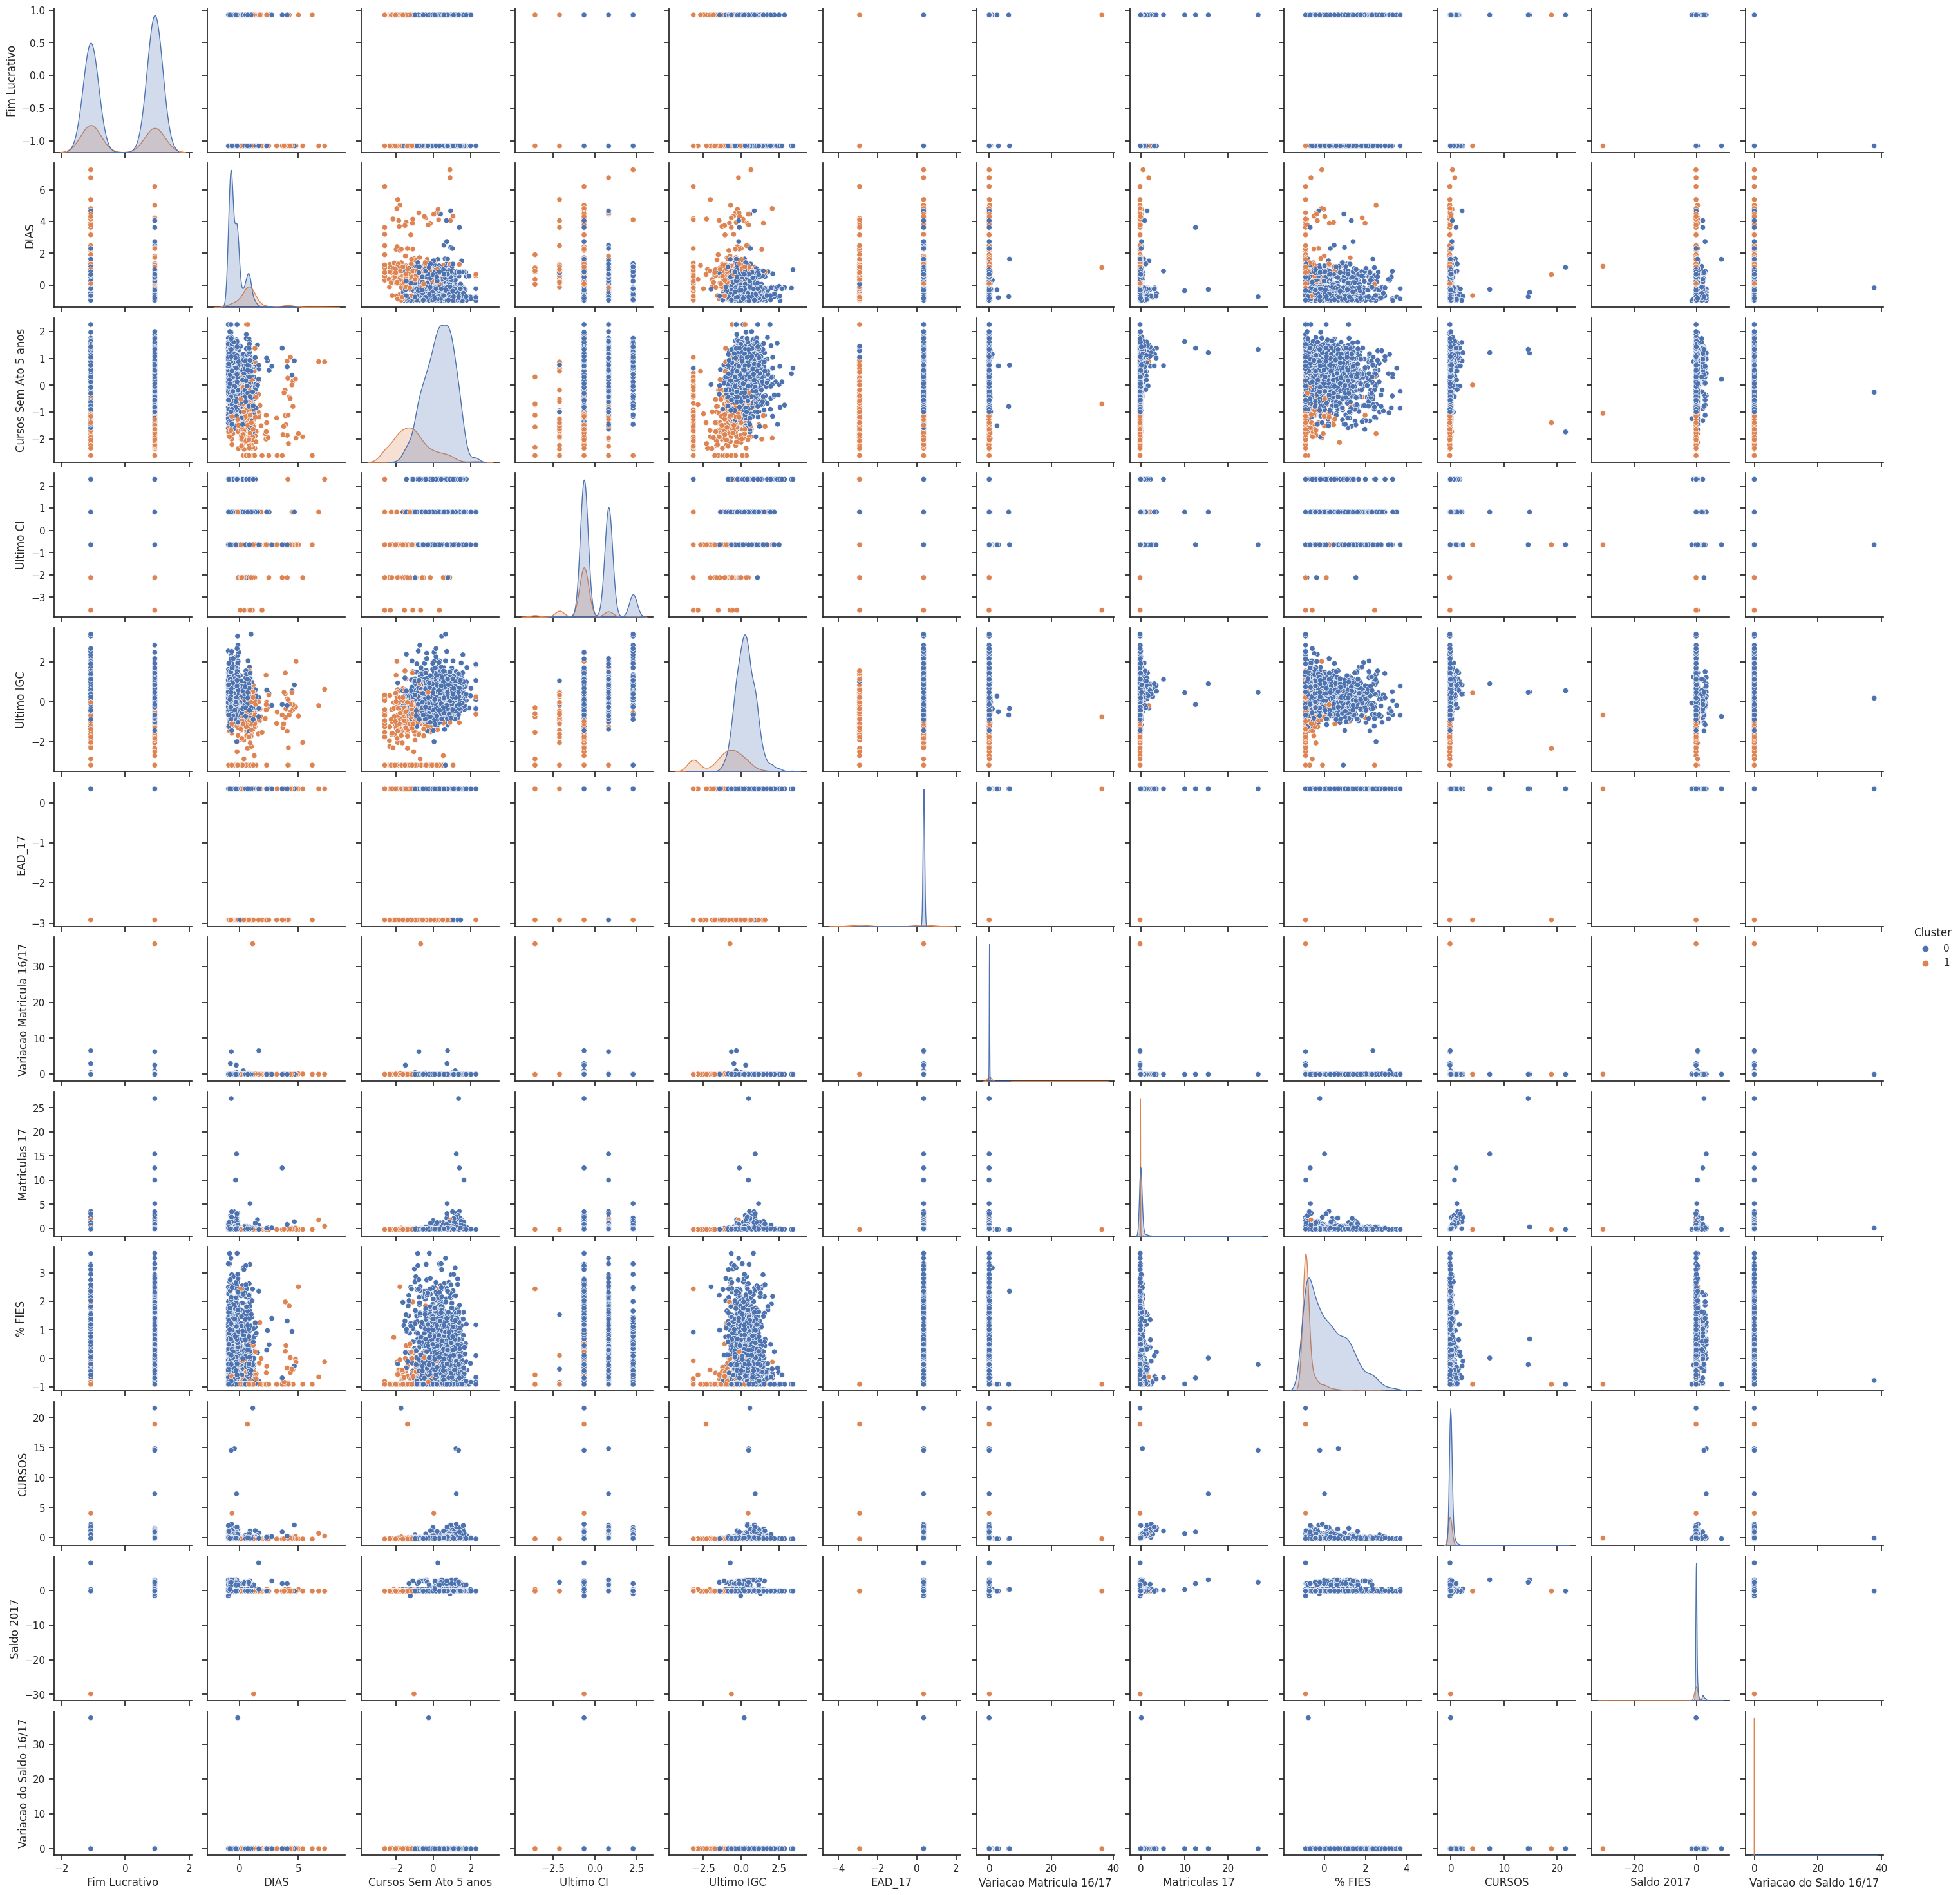

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado 'dados' com as colunas fornecidas
# dados = ...

# Criar gráficos de dispersão para todas as combinações de pares de colunas
sns.set(style="ticks")
sns.pairplot(dados_normal,hue="Cluster")
plt.show()

In [45]:
from sklearn.cluster import DBSCAN

# Aplicar o algoritmo DBSCAN
eps = 1.5  # Raio máximo para definir a vizinhança de um ponto
min_samples = 30  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
rotulos_clusters = dbscan.fit_predict(dados_normalizados)

# Os rótulos dos clusters e -1 para pontos de ruído
print("Rótulos dos Clusters:", rotulos_clusters)

# Se você deseja contar o número de pontos em cada cluster (excluindo pontos de ruído)
print("Contagem de pontos em cada cluster (excluindo pontos de ruído):")
print(pd.Series(rotulos_clusters[rotulos_clusters != -1]).value_counts())

# Se você deseja atribuir os rótulos dos clusters de volta ao DataFrame original
dados['Cluster DBSCAN'] = rotulos_clusters

print("Total: ",pd.Series(rotulos_clusters[rotulos_clusters != -1]).count())

Rótulos dos Clusters: [0 0 0 ... 0 0 0]
Contagem de pontos em cada cluster (excluindo pontos de ruído):
0    551
1    474
2     20
dtype: int64
Total:  1045


In [46]:
dados_normal_dbscan = pd.DataFrame(dados_normalizados,columns=colunas_para_clusterizacao)
dados_normal_dbscan["Cluster"] = dados["Cluster DBSCAN"]
dados_normal_dbscan.head()

,Fim Lucrativo,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17,Cluster
0,0.926628,0.961652,0.368398,-0.646632,0.122658,0.342389,0.035855,-0.187026,-0.913725,-0.174939,-0.175925,-0.026545,0
1,0.926628,-0.576317,0.764020,-0.646632,-1.148939,0.342389,-0.089175,-0.175411,-0.801757,-0.190197,-0.013686,-0.026545,0
2,0.926628,-0.825638,0.534304,0.824871,0.324079,0.342389,-0.065771,0.305022,-0.908367,0.023413,-0.171283,-0.026545,0
3,0.926628,0.787246,0.144786,-0.646632,-0.105758,0.342389,-0.033019,-0.129021,0.570163,-0.052876,-0.166333,-0.026545,0
4,-1.079182,-0.859394,1.045119,-0.646632,0.115067,0.342389,-0.021787,-0.197359,-0.913725,-0.205455,-0.176165,-0.026544,1


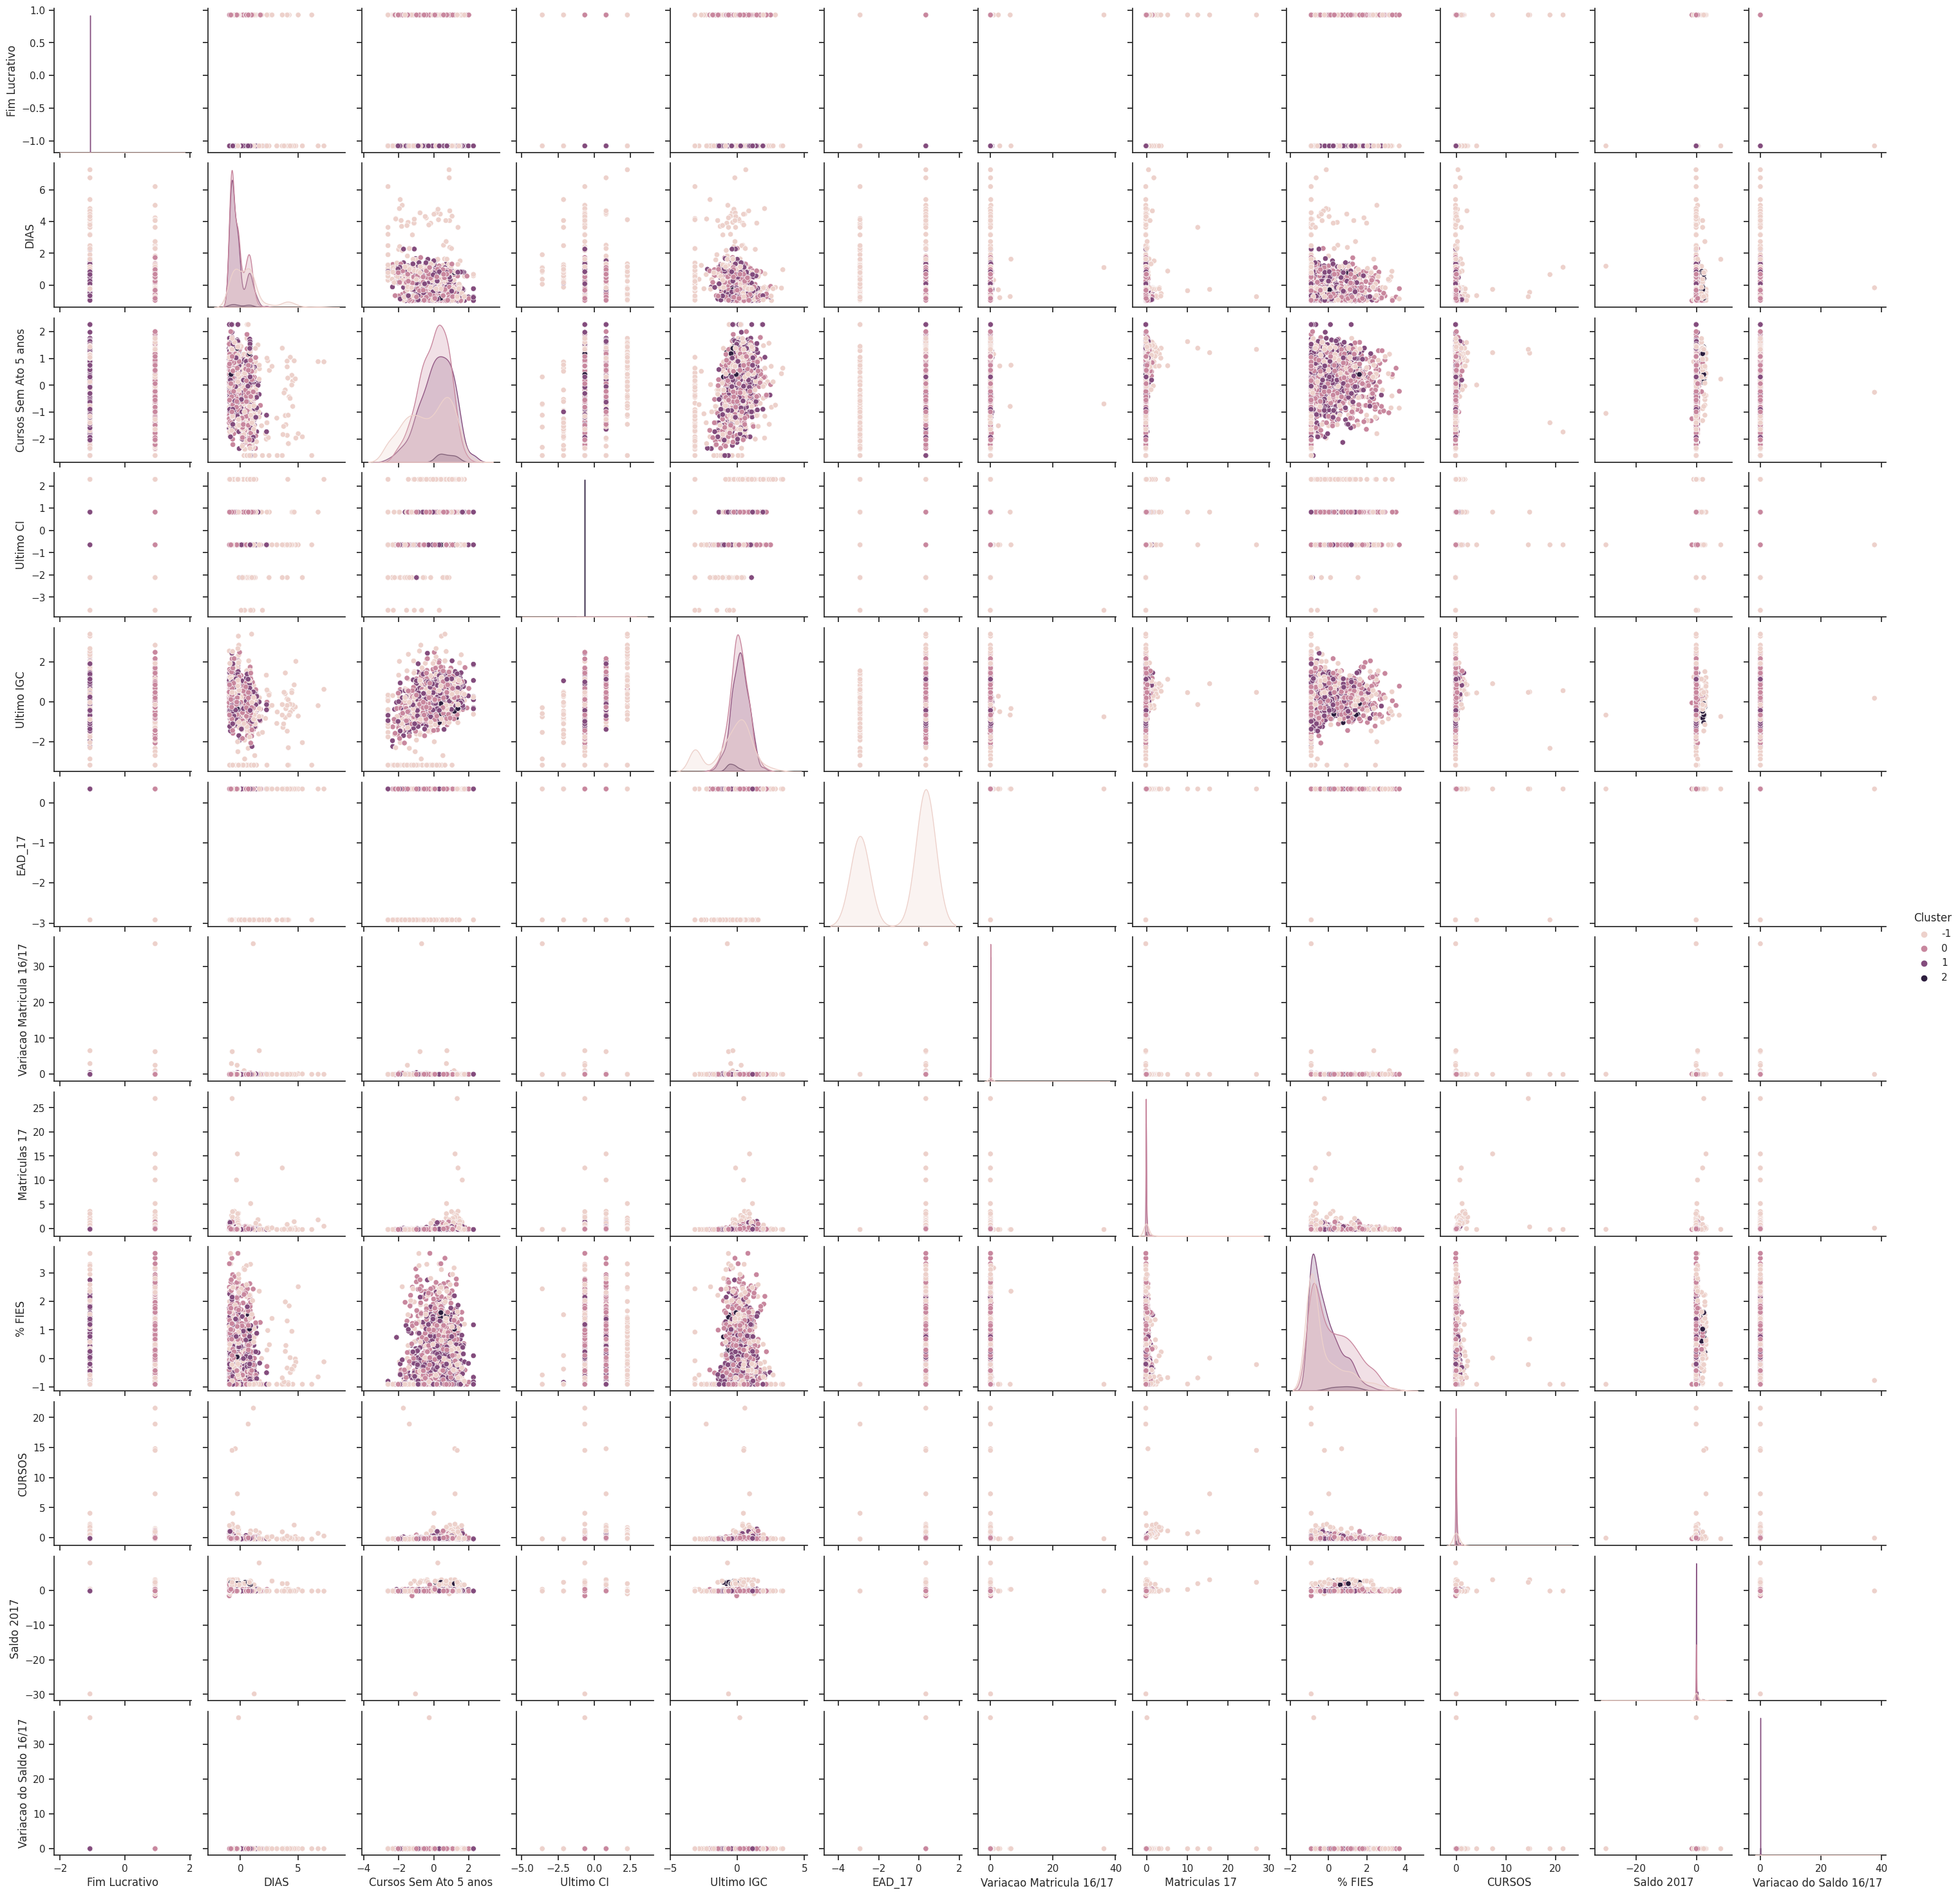

In [47]:
sns.set(style="ticks")
sns.pairplot(dados_normal_dbscan,hue="Cluster")
plt.show()

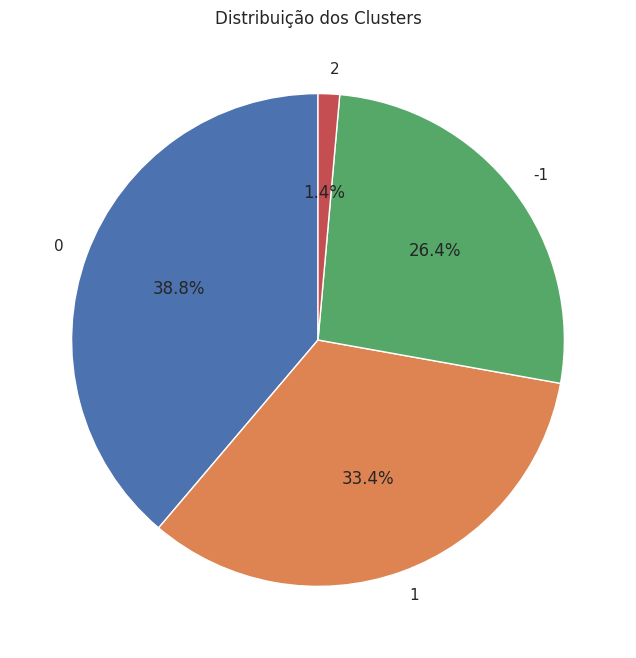

In [49]:
contagem_clusters_dbscan = dados['Cluster DBSCAN'].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_clusters_dbscan, labels=contagem_clusters_dbscan.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Clusters')
plt.show()

In [50]:
dados['Cluster DBSCAN'].value_counts()

 0    551
 1    474
-1    375
 2     20
Name: Cluster DBSCAN, dtype: int64

In [51]:
dados_clusterizados_dbscan = dados_normal_dbscan[dados_normal_dbscan["Cluster"] >= 0]

dados_clusterizados_dbscan.head()

,Fim Lucrativo,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17,Cluster
0,0.926628,0.961652,0.368398,-0.646632,0.122658,0.342389,0.035855,-0.187026,-0.913725,-0.174939,-0.175925,-0.026545,0
1,0.926628,-0.576317,0.764020,-0.646632,-1.148939,0.342389,-0.089175,-0.175411,-0.801757,-0.190197,-0.013686,-0.026545,0
2,0.926628,-0.825638,0.534304,0.824871,0.324079,0.342389,-0.065771,0.305022,-0.908367,0.023413,-0.171283,-0.026545,0
3,0.926628,0.787246,0.144786,-0.646632,-0.105758,0.342389,-0.033019,-0.129021,0.570163,-0.052876,-0.166333,-0.026545,0
4,-1.079182,-0.859394,1.045119,-0.646632,0.115067,0.342389,-0.021787,-0.197359,-0.913725,-0.205455,-0.176165,-0.026544,1


In [52]:
dados_clusterizados_dbscan.shape

(1045, 13)

In [53]:
sns.set(style="ticks")
sns.pairplot(dados_clusterizados_dbscan,hue="Cluster")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [55]:
dados.head()

,Codigo da IES,Fim Lucrativo,Situacao,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17,Cluster,Cluster DBSCAN
0,1712,1,1,6545,0.611111,3.0,2.447155,1,0.709251,227,0.000000,3,95453.00,-0.383120,0,0
1,3787,1,1,1351,0.692308,3.0,1.499900,1,-0.379487,390,0.020513,2,79979200.99,0.580656,0,0
2,1131,1,1,509,0.645161,4.0,2.597200,1,-0.175687,7132,0.000981,16,2381121.44,0.000000,0,0
3,2755,1,1,5956,0.565217,3.0,2.277000,1,0.109510,1041,0.271854,11,4818332.70,-0.117955,0,0
4,3536,0,1,395,0.750000,3.0,2.441500,1,0.207317,82,0.000000,1,-22554.53,3.900988,0,1


In [66]:
ativas_positivo_kmeans = dados[(dados["Situacao"] == 1) & (dados["Cluster"] == 0)]["Situacao"].count()
ativas_negativa_kmeans = dados[(dados["Situacao"] == 1) & (dados["Cluster"] == 1)]["Situacao"].count()
extintas_positivo_kmeans = dados[(dados["Situacao"] == 0) & (dados["Cluster"] == 1)]["Situacao"].count()
extintas_negativa_kmeans = dados[(dados["Situacao"] == 0) & (dados["Cluster"] == 0)]["Situacao"].count()

print("Ativa Positivo: ",ativas_positivo_kmeans)
print("Ativa Negativa: ",ativas_negativa_kmeans)
print("Extintas Positivo: ",extintas_positivo_kmeans)
print("Extintas Negativa: ",extintas_negativa_kmeans)

Ativa Positivo:  1098
Ativa Negativa:  237
Extintas Positivo:  68
Extintas Negativa:  17


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Suponha que você tenha rótulos reais 'y_true' e previsões do modelo 'y_pred'
y_true = dados["Situacao"]
y_pred = dados["Cluster"].apply(lambda x: 0 if x == 1 else 1)

# Calcular precisão
precisao = precision_score(y_true, y_pred)

# Calcular exatidão (recall)
exatidao = recall_score(y_true, y_pred)

# Calcular acurácia
acuracia = accuracy_score(y_true, y_pred)

# Imprimir as métricas
print("Precisão:", precisao)
print("Exatidão:", exatidao)
print("Acurácia:", acuracia)






Precisão: 0.9847533632286996
Exatidão: 0.8224719101123595
Acurácia: 0.8211267605633803


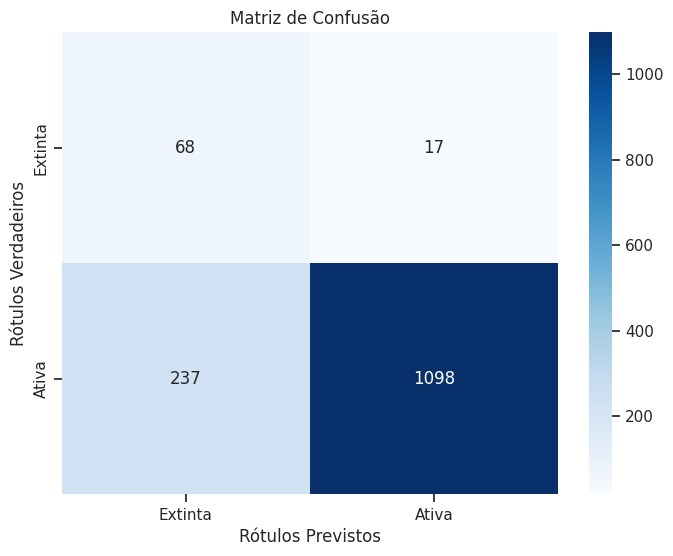

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Suponha que você tenha rótulos verdadeiros 'y_true' e previsões do modelo 'y_pred'
# y_true = ...
# y_pred = ...

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_true, y_pred)

# Criar um heatmap para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Extinta', 'Ativa'], yticklabels=['Extinta', 'Ativa'])
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()
